In [1]:
# Run some recommendation experiments using MovieLens 100K
import pandas
import numpy
import scipy.sparse
import scipy.sparse.linalg
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import random
%matplotlib inline
data_dir = "1m/ratings.dat"
data_shape = (6040, 3952)

df = pandas.read_csv(data_dir , sep="::",engine="python",header = None)


In [2]:
df.head()

,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [3]:
values = df.values
values[:, 0:2] -= 1
train_value,test_value = train_test_split(values)

(2, 0.97614491185106333, 0.98950683996226252)
(3, 0.96995586220782604, 0.98547452898609122)
(4, 0.9641802594847203, 0.98160839243599052)
(5, 0.95936750217049604, 0.97850320973484461)
(6, 0.95492622823415896, 0.97575207109041007)
(7, 0.95112839471862709, 0.97370474630072257)
(8, 0.94759718497765955, 0.97209365145153481)
(9, 0.94441611956027283, 0.97089409520241454)
(10, 0.94135008178189017, 0.96956365895674501)
(11, 0.93859576358046193, 0.96888544041810976)
(12, 0.93587913027815051, 0.96804003688636431)
(13, 0.93339905990895067, 0.96755817390491516)
(14, 0.93070132354361068, 0.96681061644883182)
(15, 0.92825989596714265, 0.96637532460457498)
(16, 0.92581758571401274, 0.96581589641571863)
(17, 0.92347379371813354, 0.96550632061338082)
(18, 0.92118836621020939, 0.96529382222707338)
(19, 0.91901116355546419, 0.96526755654592089)
(20, 0.91682785705933389, 0.9651681112186774)
(21, 0.91474387036044358, 0.96525900197587322)
(22, 0.91265501739169097, 0.96523502396496386)
(23, 0.9106440578757192

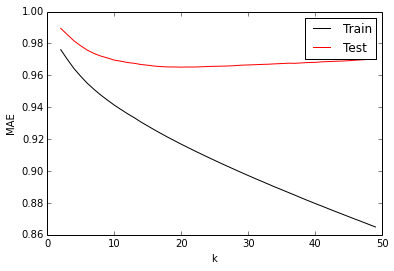

In [4]:
values = train_value
X_train = scipy.sparse.csr_matrix((values[:, 2], (values[:, 0], values[:, 1])), dtype=numpy.float, shape=data_shape)

values = test_value
X_test = scipy.sparse.csr_matrix((values[:, 2], (values[:, 0], values[:, 1])), dtype=numpy.float, shape=data_shape)

# Compute means of nonzero elements
X_row_mean = numpy.zeros(data_shape[0])
X_row_sum = numpy.zeros(data_shape[0])

train_rows, train_cols = X_train.nonzero()

# Iterate through nonzero elements to compute sums and counts of rows elements
for i in range(train_rows.shape[0]):
    X_row_mean[train_rows[i]] += X_train[train_rows[i], train_cols[i]]
    X_row_sum[train_rows[i]] += 1

# Note that (X_row_sum == 0) is required to prevent divide by zero
X_row_mean /= X_row_sum + (X_row_sum == 0)

# Subtract mean rating for each user
for i in range(train_rows.shape[0]):
    X_train[train_rows[i], train_cols[i]] -= X_row_mean[train_rows[i]]

test_rows, test_cols = X_test.nonzero()
for i in range(test_rows.shape[0]):
    X_test[test_rows[i], test_cols[i]] -= X_row_mean[test_rows[i]]

X_train = numpy.array(X_train.toarray())
X_test = numpy.array(X_test.toarray())

ks = numpy.arange(2, 50)
train_mae = numpy.zeros(ks.shape[0])
test_mae = numpy.zeros(ks.shape[0])
train_scores = X_train[(train_rows, train_cols)]
test_scores = X_test[(test_rows, test_cols)]

# Now take SVD of X_train
U, s, Vt = numpy.linalg.svd(X_train, full_matrices=False)

for j, k in enumerate(ks):
    X_pred = U[:, 0:k].dot(numpy.diag(s[0:k])).dot(Vt[0:k, :])

    pred_train_scores = X_pred[(train_rows, train_cols)]
    pred_test_scores = X_pred[(test_rows, test_cols)]

    train_mae[j] = mean_squared_error(train_scores, pred_train_scores)**0.5
    test_mae[j] = mean_squared_error(test_scores, pred_test_scores)**0.5

    print(k,  train_mae[j], test_mae[j])

plt.plot(ks, train_mae, 'k', label="Train")
plt.plot(ks, test_mae, 'r', label="Test")
plt.xlabel("k")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [6]:
train_scores

array([ 1.39694656, -0.60305344,  0.39694656, ..., -0.39240506,
       -0.39240506, -0.39240506])